In [166]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [167]:
df_train = pd.read_csv("C:\\Users\\266251\\Downloads\\application_train.csv")


In [168]:
df_test =  pd.read_csv("C:\\Users\\266251\\Downloads\\application_test.csv")

In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,...,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,...,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,...,0.089403,0.023967,0.022463,0.018058,0.083078,0.111287,0.206680,0.913544,0.825488,1.870100
min,157876.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232638.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19689.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307140.500000,0.000000,0.000000,1.476000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15753.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,381476.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,22.000000


In [8]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 239.7+ MB


In [177]:
df_train.shape

(257512, 122)

In [178]:
df_test.shape

(49999, 121)

In [179]:
df_test['TARGET']=np.NAN

In [161]:
df = pd.concat([df_train,df_test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 49998
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 288.6+ MB


In [109]:
df.isnull().sum()

AMT_ANNUITY                         12
AMT_CREDIT                           0
AMT_GOODS_PRICE                    278
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
CODE_GENDER                          0
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE   

In [364]:
df1.WALLSMATERIAL_MODE.isnull().sum()

156341

In [365]:
df1.WALLSMATERIAL_MODE.unique()

array([nan, 'Stone, brick', 'Mixed', 'Panel', 'Wooden', 'Others', 'Block',
       'Monolithic'], dtype=object)

In [366]:
df1.WALLSMATERIAL_MODE.value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [291]:
catagorical_columns.isnull().sum()

CODE_GENDER                        0
EMERGENCYSTATE_MODE                0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
FONDKAPREMONT_MODE                 0
HOUSETYPE_MODE                     0
NAME_CONTRACT_TYPE                 0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
NAME_TYPE_SUITE                    0
OCCUPATION_TYPE                    0
ORGANIZATION_TYPE                  0
WALLSMATERIAL_MODE            156341
WEEKDAY_APPR_PROCESS_START         0
dtype: int64

In [169]:
df1=df

In [172]:
# Replacing the 'XNA' value with NAN
df1['CODE_GENDER']=df1.CODE_GENDER.replace('XNA',np.nan)

In [175]:
#Replacing the nan value with fillna of MODE operation
df1['CODE_GENDER']=df1.groupby(['NAME_EDUCATION_TYPE'])['CODE_GENDER'].transform(lambda x: x.fillna(x.mode()[0]))


In [190]:
df1.EMERGENCYSTATE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['EMERGENCYSTATE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [203]:
df1.FONDKAPREMONT_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['FONDKAPREMONT_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [213]:
df1.HOUSETYPE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['HOUSETYPE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [223]:
df1['NAME_FAMILY_STATUS']=df1.NAME_FAMILY_STATUS.replace('Unknown',np.nan)

In [227]:
df1.NAME_FAMILY_STATUS=df1.groupby(['NAME_EDUCATION_TYPE'])['NAME_FAMILY_STATUS'].transform(lambda x: x.fillna(x.mode()[0]))

In [237]:
df1.NAME_TYPE_SUITE=df1.groupby(['NAME_FAMILY_STATUS'])['NAME_TYPE_SUITE'].transform(lambda x: x.fillna(x.mode()[0]))

In [244]:
df1.OCCUPATION_TYPE=df1.groupby(['NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()[0]))

In [368]:
#need to update based on other numeric feature based.
df1.WALLSMATERIAL_MODE=df1.groupby(['NAME_HOUSING_TYPE','OCCUPATION_TYPE'])['WALLSMATERIAL_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

IndexError: index out of bounds

In [300]:
df1.REGION_POPULATION_RELATIVE.isnull().value_counts()

False    307510
True          1
Name: AMT_GOODS_PRICE, dtype: int64

#Numerical Column analysis 

In [370]:

from sklearn.feature_selector import FeatureSelector

import pandas as pd

ModuleNotFoundError: No module named 'sklearn.feature_selector'

In [295]:
numerical_columns.isnull().sum()

AMT_ANNUITY                          0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      1
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE               1
DAYS_REGISTRATION        

In [272]:
anomalies

NameError: name 'anomalies' is not defined

In [336]:
df1.DAYS_ID_PUBLISH .mean()

-2994.2023732484367

In [337]:
df1.DAYS_ID_PUBLISH .min()

-7197

In [338]:
df1.DAYS_ID_PUBLISH .max()

0

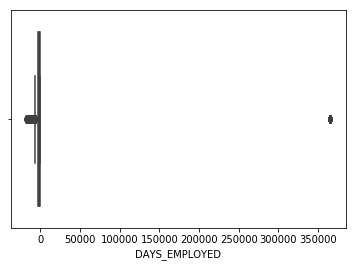

In [339]:
#Outlier
import seaborn as sns
sns.boxplot(x=df1['DAYS_EMPLOYED'])

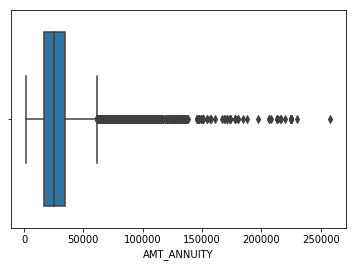

In [340]:
#Outlier AMT_ANNUITY
import seaborn as sns
sns.boxplot(x=df1['AMT_ANNUITY'])

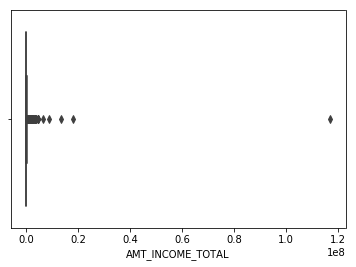

In [341]:
#Outlier AMT_INCOME_TOTAL
import seaborn as sns
sns.boxplot(x=df1['AMT_INCOME_TOTAL'])

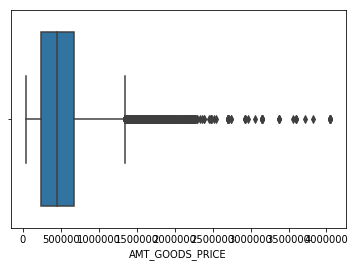

In [342]:
#Outlier AMT_GOODS_PRICE
import seaborn as sns
sns.boxplot(x=df1['AMT_GOODS_PRICE'])

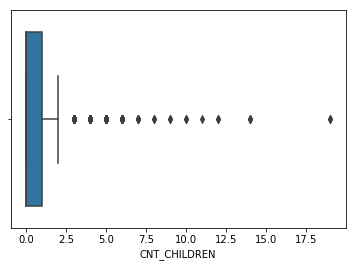

In [346]:
#Outlier CNT_CHILDREN
import seaborn as sns
sns.boxplot(x=df1['CNT_CHILDREN'])

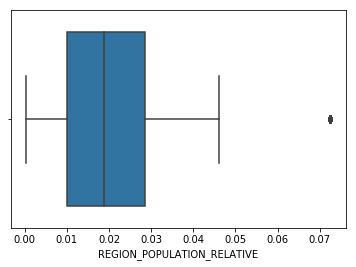

In [348]:
#Outlier CNT_CHILDREN
import seaborn as sns
sns.boxplot(x=df1['REGION_POPULATION_RELATIVE'])

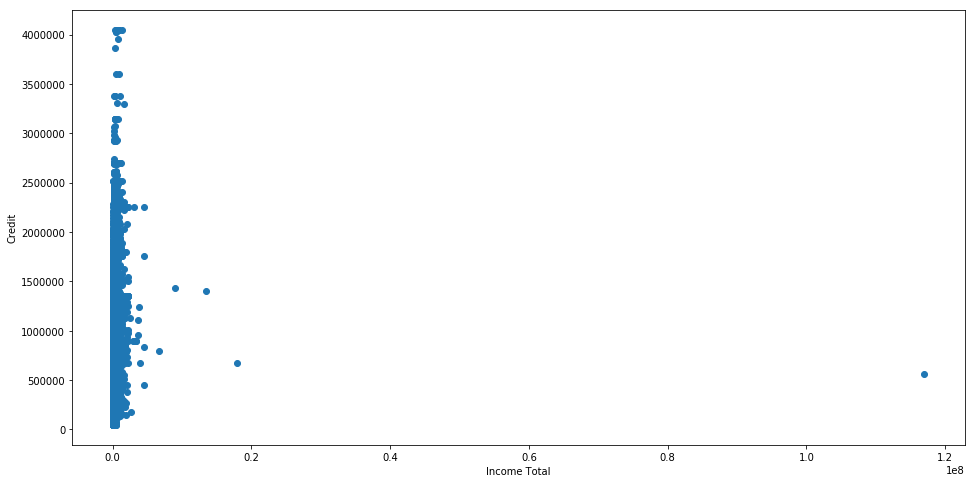

In [363]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['AMT_INCOME_TOTAL'], df1['AMT_CREDIT'])
ax.set_xlabel('Income Total')
ax.set_ylabel('Credit')
plt.show()

In [354]:
# Finding Outlier by Stats Zscore

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(numerical_columns))
print(z)

[[0.75576461 0.63411742        nan ...        nan        nan        nan]
 [0.90098004 0.85958383        nan ...        nan        nan        nan]
 [0.00749725 0.14665205        nan ...        nan        nan        nan]
 ...
 [0.05469088 0.74777984        nan ...        nan        nan        nan]
 [0.53740283 0.55060233        nan ...        nan        nan        nan]
 [0.85263573 0.85548932        nan ...        nan        nan        nan]]


In [355]:
threshold = 3
print(np.where(z > 3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([     0,      1,      2, ..., 307504, 307505, 307508], dtype=int64), array([93, 56, 74, ..., 46, 90, 58], dtype=int64))


In [356]:
# First array contains the list of the row and second array contains the respective column numbers
print(z[0][93])

3.4339730714390235


In [357]:
#IQR
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AMT_ANNUITY                      18072.000000
AMT_CREDIT                      538650.000000
AMT_GOODS_PRICE                 441000.000000
AMT_INCOME_TOTAL                 90000.000000
AMT_REQ_CREDIT_BUREAU_DAY            0.000000
AMT_REQ_CREDIT_BUREAU_HOUR           0.000000
AMT_REQ_CREDIT_BUREAU_MON            0.000000
AMT_REQ_CREDIT_BUREAU_QRT            0.000000
AMT_REQ_CREDIT_BUREAU_WEEK           0.000000
AMT_REQ_CREDIT_BUREAU_YEAR           3.000000
APARTMENTS_AVG                       0.090800
APARTMENTS_MEDI                      0.090600
APARTMENTS_MODE                      0.091400
BASEMENTAREA_AVG                     0.068000
BASEMENTAREA_MEDI                    0.067900
BASEMENTAREA_MODE                    0.071700
CNT_CHILDREN                         1.000000
CNT_FAM_MEMBERS                      1.000000
COMMONAREA_AVG                       0.043700
COMMONAREA_MEDI                      0.043400
COMMONAREA_MODE                      0.041800
DAYS_BIRTH                        

In [362]:

df1.query('DAYS_EMPLOYED==365243').head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
1,40167.0,945000.0,945000.0,247500.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,17266.5,298512.0,270000.0,63000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN
7,20677.5,545040.0,450000.0,90000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN
19,34573.5,348264.0,315000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
22,16735.5,167895.0,157500.0,51750.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df1.AMT_ANNUITY=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))

In [293]:
df1.AMT_GOODS_PRICE=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_GOODS_PRICE'].transform(lambda x: x.fillna(x.mean()))

In [320]:
def feature_scaling(df1):
    df1 -= df1.min()
    df1 /= df1.max()
    return df1

In [ ]:
df1['AMT_ANNUITY'] = feature_scaling(df1['AMT_ANNUITY'])
df1['AMT_GOODS_PRICE'] = feature_scaling(df1['AMT_GOODS_PRICE'])
df1['CNT_CHILDREN'] = feature_scaling(df1['CNT_CHILDREN'])
df1['AMT_ANNUITY'] = feature_scaling(df1['AMT_ANNUITY'])
df1['AMT_GOODS_PRICE'] = feature_scaling(df1['AMT_GOODS_PRICE'])
df1['REGION_POPULATION_RELATIVE'] = feature_scaling(df1['REGION_POPULATION_RELATIVE'])
df1['SEC_INSTAL_AMT'] = feature_scaling(df1['SEC_INSTAL_AMT'])

In [289]:
catagorical_columns=df1.select_dtypes(include='object')

In [294]:
numerical_columns=df1.select_dtypes(exclude='object')

In [183]:
catagorical_columns.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,Unaccompanied,Medicine staff,Medicine,NaN,TUESDAY
1,M,NaN,Y,N,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,WEDNESDAY
2,M,No,N,Y,NaN,NaN,Revolving loans,Secondary / secondary special,Married,House / apartment,Working,Unaccompanied,Sales staff,Business Entity Type 3,"Stone, brick",SATURDAY
3,F,No,N,Y,org spec account,block of flats,Cash loans,Higher education,Married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 2,Mixed,SUNDAY
4,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,Municipal apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,THURSDAY


In [186]:
catagorical_columns.columns

"""'CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'"""

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [ ]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Item_Identifier","source"]))

In [ ]:
df1=pd.concat([df1,pd.get_dummies(df1.NAME_CONTRACT_TYPE,df1.)],axis=1)

In [35]:
#from sklearn.feature_selection import info_gain
from sklearn.feature_selection import selectkbest,chi2
from sklearn.ensamble import IsolationForest

ImportError: cannot import name 'selectkbest'

In [288]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
class SelectKBest(_BaseFilter):
    """Select features according to the k highest scores.
    Read more in the :ref:`User Guide <univariate_feature_selection>`.
    Parameters
    ----------
    score_func : callable
        Function taking two arrays X and y, and returning a pair of arrays
        (scores, pvalues) or a single array with scores.
        Default is f_classif (see below "See also"). The default function only
        works with classification tasks.
    k : int or "all", optional, default=10
        Number of top features to select.
        The "all" option bypasses selection, for use in a parameter search.
    Attributes
    ----------
    scores_ : array-like, shape=(n_features,)
        Scores of features.
    pvalues_ : array-like, shape=(n_features,)
        p-values of feature scores, None if `score_func` returned only scores.
    Examples
    --------
    >>> from sklearn.datasets import load_digits
    >>> from sklearn.feature_selection import SelectKBest, chi2
    >>> X, y = load_digits(return_X_y=True)
    >>> X.shape
    (1797, 64)
    >>> X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
    >>> X_new.shape
    (1797, 20)
    Notes
    -----
    Ties between features with equal scores will be broken in an unspecified
    way.
    See also
    --------
    f_classif: ANOVA F-value between label/feature for classification tasks.
    mutual_info_classif: Mutual information for a discrete target.
    chi2: Chi-squared stats of non-negative features for classification tasks.
    f_regression: F-value between label/feature for regression tasks.
    mutual_info_regression: Mutual information for a continuous target.
    SelectPercentile: Select features based on percentile of the highest scores.
    SelectFpr: Select features based on a false positive rate test.
    SelectFdr: Select features based on an estimated false discovery rate.
    SelectFwe: Select features based on family-wise error rate.
    GenericUnivariateSelect: Univariate feature selector with configurable mode.
    """

    def __init__(self, score_func=f_classif, k=10):
        super().__init__(score_func)
        self.k = k

    def _check_params(self, X, y):
        if not (self.k == "all" or 0 <= self.k <= X.shape[1]):
            raise ValueError("k should be >=0, <= n_features = %d; got %r. "
                             "Use k='all' to return all features."
                             % (X.shape[1], self.k))

    def _get_support_mask(self):
        check_is_fitted(self, 'scores_')

        if self.k == 'all':
            return np.ones(self.scores_.shape, dtype=bool)
        elif self.k == 0:
            return np.zeros(self.scores_.shape, dtype=bool)
        else:
            scores = _clean_nans(self.scores_)
            mask = np.zeros(scores.shape, dtype=bool)

            # Request a stable sort. Mergesort takes more memory (~40MB per
            # megafeature on x86-64).
            mask[np.argsort(scores, kind="mergesort")[-self.k:]] = 1
            return mask